# Configuration

In [1]:
# Parameters
ENABLE_COLAB = False

PROJECT_NAME = 'ML1010-Group-Project'
EXPERIMENT_NAME = 'ReviewText_Lemma_Bert (Random Forest)'
FILE_NAME = '01_ML1010_GP_RF_Bert'
LOAD_FROM_EXP = True

#Root Machine Learning Directory. Projects appear underneath
GOOGLE_DRIVE_MOUNT = '/content/gdrive' 
COLAB_ROOT_DIR = GOOGLE_DRIVE_MOUNT + '/MyDrive/Colab Notebooks'
COLAB_INIT_DIR = COLAB_ROOT_DIR + '/utility_files'

LOCAL_ROOT_DIR = '/home/magni//ML_Root/project_root'
LOCAL_INIT_DIR = LOCAL_ROOT_DIR + '/utility_files'

# Bootstrap Environment

In [2]:
#add in support for utility file directory and importing
import sys
import os

if ENABLE_COLAB:
  #Need access to drive
  from google.colab import drive
  drive.mount(GOOGLE_DRIVE_MOUNT, force_remount=True)
  
  #add in utility directory to syspath to import 
  INIT_DIR = COLAB_INIT_DIR
  sys.path.append(os.path.abspath(INIT_DIR))
  
  #Config environment variables
  ROOT_DIR = COLAB_ROOT_DIR
  
else:
  #add in utility directory to syspath to import
  INIT_DIR = LOCAL_INIT_DIR
  sys.path.append(os.path.abspath(INIT_DIR))
  
  #Config environment variables
  ROOT_DIR = LOCAL_ROOT_DIR

#Import Utility Support
from jarvis import Jarvis
jarvis = Jarvis(ROOT_DIR, PROJECT_NAME)

import mv_python_utils as mvutils

Wha...where am I?
I am awake now.

I have set your current working directory to /home/magni/ML_Root/project_root/ML1010-Group-Project
The current time is 13:46
Hello sir. Reminder, no more coffee.



# Setup Runtime Environment

In [3]:
if ENABLE_COLAB:
  #!pip install scipy -q
  #!pip install scikit-learn -q
  #!pip install pycaret -q
  #!pip install matplotlib -q
  #!pip install joblib -q
  #!pip install pandasql -q
  !pip install umap_learn -q
  !pip install sentence_transformers -q
  !pip install spacytextblob -q
  !pip install flair -q
  display('Google Colab enabled')
else:
  display('Google Colab not enabled')

#Common imports
import json
import pandas as pd
import numpy as np
import matplotlib
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
#from yellowbrick.classifier import ConfusionMatrix
#from sklearn.linear_model import LogisticRegression
from yellowbrick.target import ClassBalance
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

nltk.download('stopwords')
%matplotlib inline

'Google Colab not enabled'

[nltk_data] Downloading package stopwords to /home/magni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import cw_df_metric_utils as cwutils
import importlib
import DataPackage as dp
import DataPackageSupport as dps
import DataExperiment
import DataExperimentSupport

In [5]:
axis_labels5=[1,2,3,4,5]
axis_labels2=[0,1]

# Load Data

In [6]:
#classifier = XGBClassifier(eval_metric='mlogloss')
#experimentName = 'ReviewText_Lemma_Bert (XGBoost)'

#classifier = SVC(gamma=0.001, verbose=True)
#experimentName = 'ReviewText_Lemma_Bert (SVC)'

In [6]:
if LOAD_FROM_EXP:
    #start from saved state
    myExp = jarvis.loadExperiment(FILE_NAME)
    myExp.display()

else:
    #start from source file and regenerate
    testDf = pd.read_pickle(jarvis.DATA_DIR_WORK + "/01_NL_ReviewText_All(new).pkl.gz")

    testDfBert = cwutils.getBertEncodeFrame(df=testDf,
                                            bertColumn='reviewText_lemma_bert',
                                            uniqueColumn='uuid',
                                            otherColumns=['overall']
                                            )

    classifier = RandomForestClassifier()

    myExp = DataExperiment.DataExperiment(projectName=PROJECT_NAME,
                                          experimentName=EXPERIMENT_NAME,
                                          origData=testDfBert,
                                          uniqueColumn='uuid',
                                          targetColumn='overall',
                                          classifier=classifier)

DataExperiment summary:
---> projectName: ML1010-Group-Project
---> experimentName: ReviewText_Lemma_Bert (Random Forest)
---> isDataPackageLoaded: True
---> isBaseModelLoaded: True
---> isBaseModelPredicted: True
---> isBaseModelLearningCurveCreated: True
---> isFinalModelLoaded: True
---> isFinalModelPredicted: True
---> isFinalModelLearningCurveCreated: True
---> isClassifierLoaded: True
RandomForestClassifier()

    DataPackage summary:
    Attributes:
    ---> uniqueColumn: uuid
    ---> targetColumn: overall
    Process:
    ---> isBalanced: True
    ---> isTrainTestSplit: True
    Data:
    ---> isOrigDataLoaded: False
    ---> isTrainDataLoaded: True
    ---> isTestDataLoaded: True


In [9]:
myExp.processDataPackage()

'Original data frame is not loaded'

AttributeError: 'NoneType' object has no attribute 'copy'

In [9]:
myExp.display()

DataExperiment summary:
---> projectName: ML1010-Group-Project
---> experimentName: ReviewText_Lemma_Bert (Random Forest)
---> isDataPackageLoaded: True
---> isBaseModelLoaded: False
---> isBaseModelPredicted: False
---> isBaseModelLearningCurveCreated: False
---> isFinalModelLoaded: False
---> isFinalModelPredicted: False
---> isFinalModelLearningCurveCreated: False
---> isClassifierLoaded: True
RandomForestClassifier()

    DataPackage summary:
    Attributes:
    ---> uniqueColumn: uuid
    ---> targetColumn: overall
    Process:
    ---> isBalanced: True
    ---> isTrainTestSplit: True
    Data:
    ---> isOrigDataLoaded: False
    ---> isTrainDataLoaded: True
    ---> isTestDataLoaded: True


In [10]:
myExp.createBaseModel()

In [12]:
myExp.predictBaseModel()

Base Model Stats:
Accuracy: 0.44
Precision: 0.44
Recalll: 0.44
F1 Score: 0.44
Cohen kappa:: 0.3


  0%|          | 0/101 [00:00<?, ?it/s]

Feature Importance Summary:
---> Original feature count: 768
---> Returned feature count: 43
---> Removed feature count: 725
---> Return items above (including): 0.002


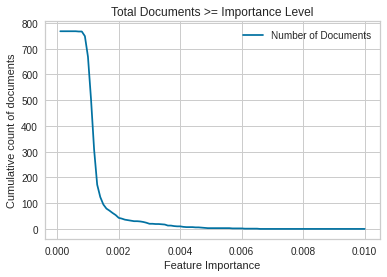

In [13]:
impFeatures = myExp.analyzeBaseModelFeatureImportance(returnAbove=0.002)

In [14]:
myExp.createFinalModel(featureImportanceThreshold=0.002)

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

In [15]:
myExp.display()

DataExperiment summary:
---> projectName: ML1010-Group-Project
---> experimentName: ReviewText_Lemma_Bert (Random Forest)
---> isDataPackageLoaded: True
---> isBaseModelLoaded: True
---> isBaseModelPredicted: True
---> isBaseModelLearningCurveCreated: False
---> isFinalModelLoaded: True
---> isFinalModelPredicted: False
---> isFinalModelLearningCurveCreated: False
---> isClassifierLoaded: True
RandomForestClassifier()

    DataPackage summary:
    Attributes:
    ---> uniqueColumn: uuid
    ---> targetColumn: overall
    Process:
    ---> isBalanced: True
    ---> isTrainTestSplit: True
    Data:
    ---> isOrigDataLoaded: False
    ---> isTrainDataLoaded: True
    ---> isTestDataLoaded: True


In [16]:
myExp.predictFinalModel()
myExp.display()

Final Model Stats:
Accuracy: 0.44
Precision: 0.43
Recalll: 0.44
F1 Score: 0.43
Cohen kappa:: 0.3
DataExperiment summary:
---> projectName: ML1010-Group-Project
---> experimentName: ReviewText_Lemma_Bert (Random Forest)
---> isDataPackageLoaded: True
---> isBaseModelLoaded: True
---> isBaseModelPredicted: True
---> isBaseModelLearningCurveCreated: False
---> isFinalModelLoaded: True
---> isFinalModelPredicted: True
---> isFinalModelLearningCurveCreated: False
---> isClassifierLoaded: True
RandomForestClassifier()

    DataPackage summary:
    Attributes:
    ---> uniqueColumn: uuid
    ---> targetColumn: overall
    Process:
    ---> isBalanced: True
    ---> isTrainTestSplit: True
    Data:
    ---> isOrigDataLoaded: False
    ---> isTrainDataLoaded: True
    ---> isTestDataLoaded: True


In [17]:
myExp.createBaseModelLearningCurve(n_jobs=10)

[learning_curve] Training set sizes: [ 942 1885 4713 9427]


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  20 | elapsed:    2.4s remaining:   13.9s
[Parallel(n_jobs=10)]: Done   9 out of  20 | elapsed:    5.9s remaining:    7.2s
[Parallel(n_jobs=10)]: Done  15 out of  20 | elapsed:   13.3s remaining:    4.4s
[Parallel(n_jobs=10)]: Done  20 out of  20 | elapsed:   22.3s finished


In [18]:
myExp.createFinalModelLearningCurve(n_jobs=10)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


[learning_curve] Training set sizes: [ 942 1885 4713 9427]


[Parallel(n_jobs=10)]: Done   3 out of  20 | elapsed:    0.5s remaining:    3.0s
[Parallel(n_jobs=10)]: Done   9 out of  20 | elapsed:    1.3s remaining:    1.6s
[Parallel(n_jobs=10)]: Done  15 out of  20 | elapsed:    3.0s remaining:    1.0s
[Parallel(n_jobs=10)]: Done  20 out of  20 | elapsed:    5.0s finished


  0%|          | 0/251 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

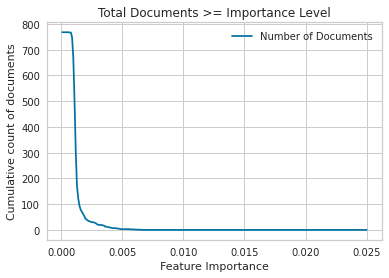

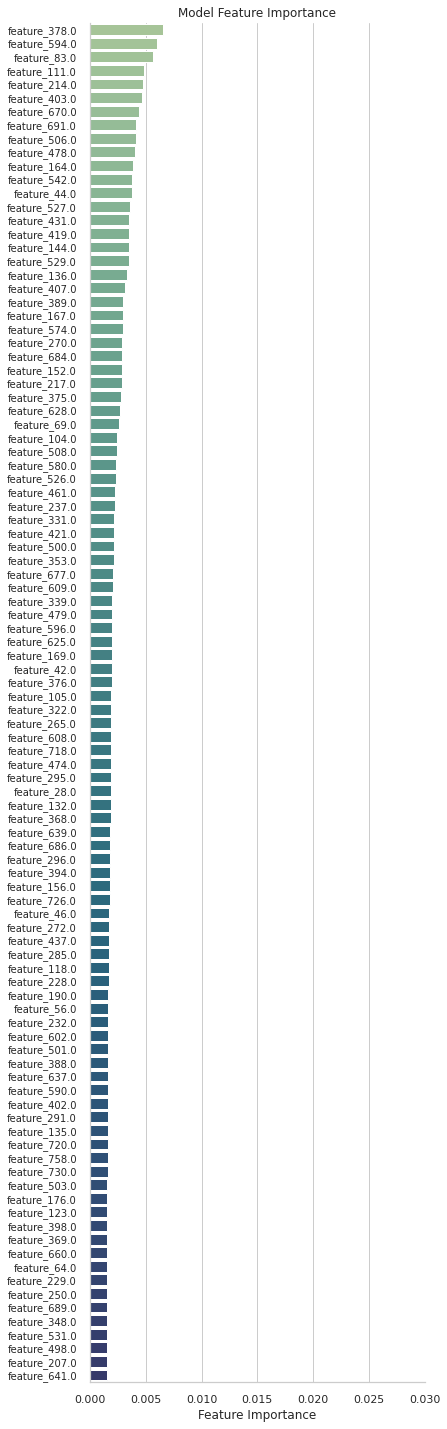

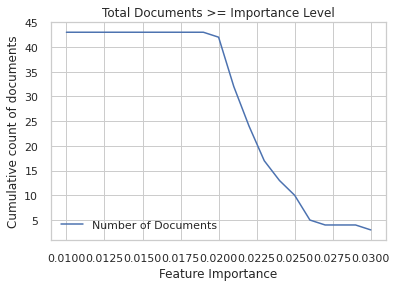

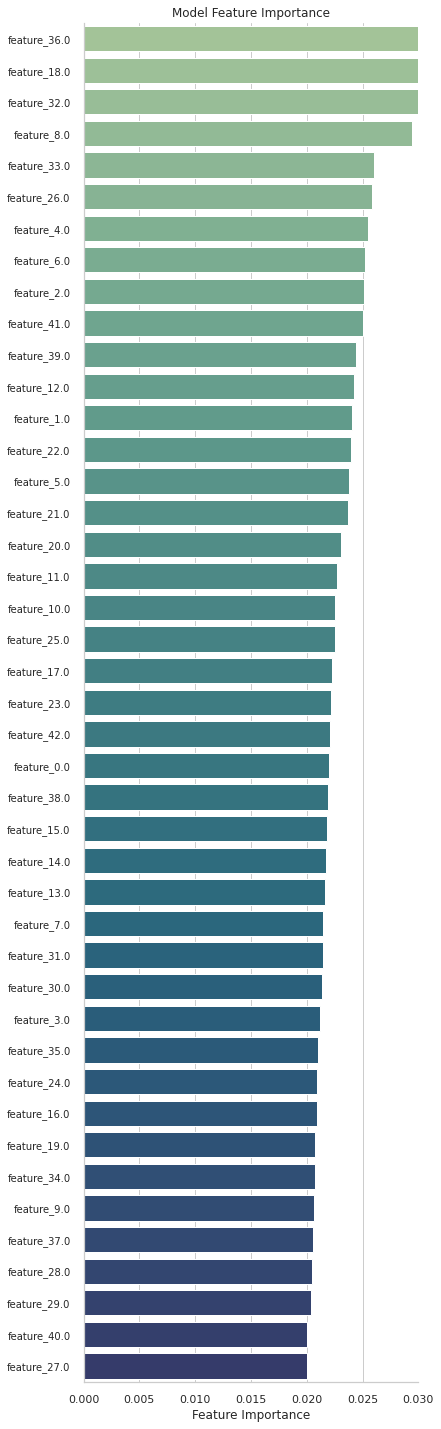

In [19]:
myExp.showBaseModelFeatureImportance(upperValue=0.025)
myExp.showFinalModelFeatureImportance(startValue=0.01,
                                      increment=0.001,
                                      upperValue=0.03)

In [20]:
myExp.display()

DataExperiment summary:
---> projectName: ML1010-Group-Project
---> experimentName: ReviewText_Lemma_Bert (Random Forest)
---> isDataPackageLoaded: True
---> isBaseModelLoaded: True
---> isBaseModelPredicted: True
---> isBaseModelLearningCurveCreated: True
---> isFinalModelLoaded: True
---> isFinalModelPredicted: True
---> isFinalModelLearningCurveCreated: True
---> isClassifierLoaded: True
RandomForestClassifier()

    DataPackage summary:
    Attributes:
    ---> uniqueColumn: uuid
    ---> targetColumn: overall
    Process:
    ---> isBalanced: True
    ---> isTrainTestSplit: True
    Data:
    ---> isOrigDataLoaded: False
    ---> isTrainDataLoaded: True
    ---> isTestDataLoaded: True


Base Model Stats:
Accuracy: 0.44
Precision: 0.44
Recalll: 0.44
F1 Score: 0.44
Cohen kappa:: 0.3
              precision    recall  f1-score   support

         1.0       0.51      0.61      0.55       589
         2.0       0.36      0.34      0.35       589
         3.0       0.33      0.26      0.29       590
         4.0       0.40      0.43      0.42       589
         5.0       0.58      0.58      0.58       589

    accuracy                           0.44      2946
   macro avg       0.44      0.44      0.44      2946
weighted avg       0.44      0.44      0.44      2946



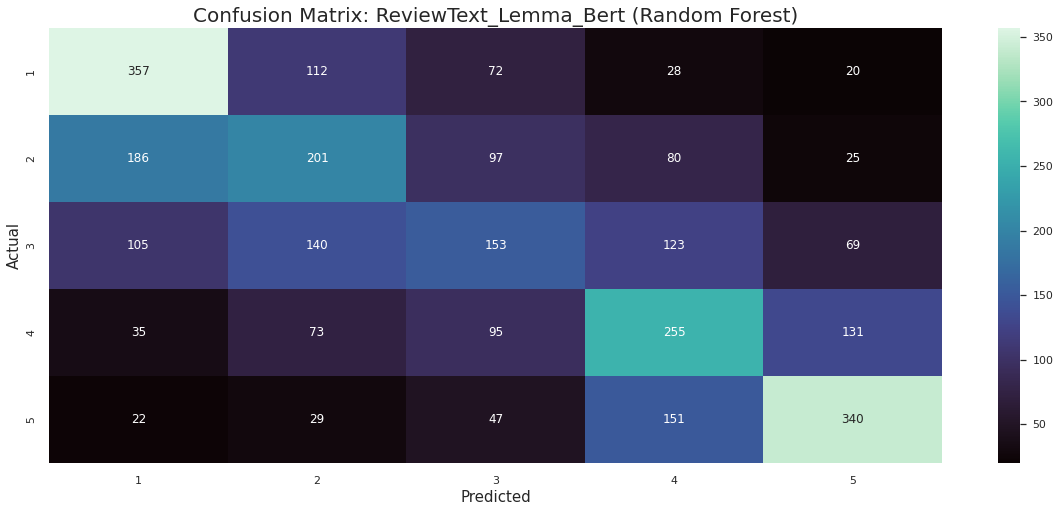

<Figure size 1440x576 with 0 Axes>

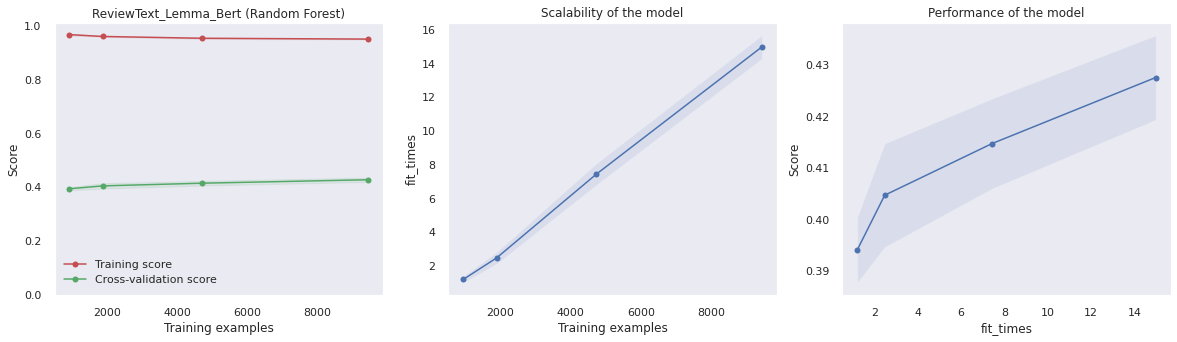

Base model ROCAUC not calculated. Starting now


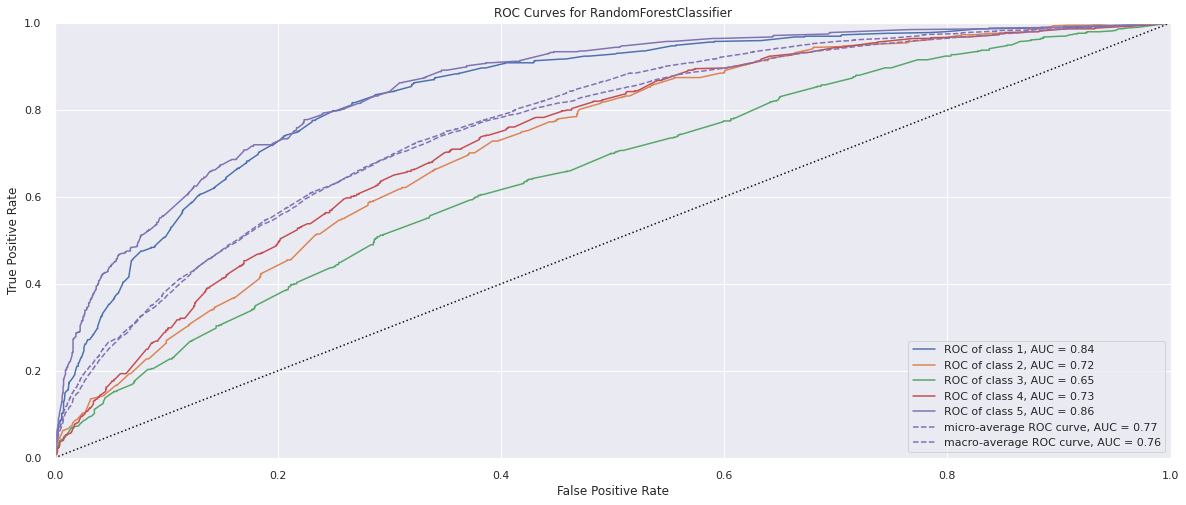

In [22]:
myExp.showBaseModelReport(axis_labels5)

Final Model Stats:
Accuracy: 0.44
Precision: 0.43
Recalll: 0.44
F1 Score: 0.43
Cohen kappa:: 0.3
              precision    recall  f1-score   support

         1.0       0.50      0.60      0.55       589
         2.0       0.37      0.34      0.36       589
         3.0       0.32      0.25      0.28       590
         4.0       0.38      0.41      0.40       589
         5.0       0.58      0.59      0.58       589

    accuracy                           0.44      2946
   macro avg       0.43      0.44      0.43      2946
weighted avg       0.43      0.44      0.43      2946



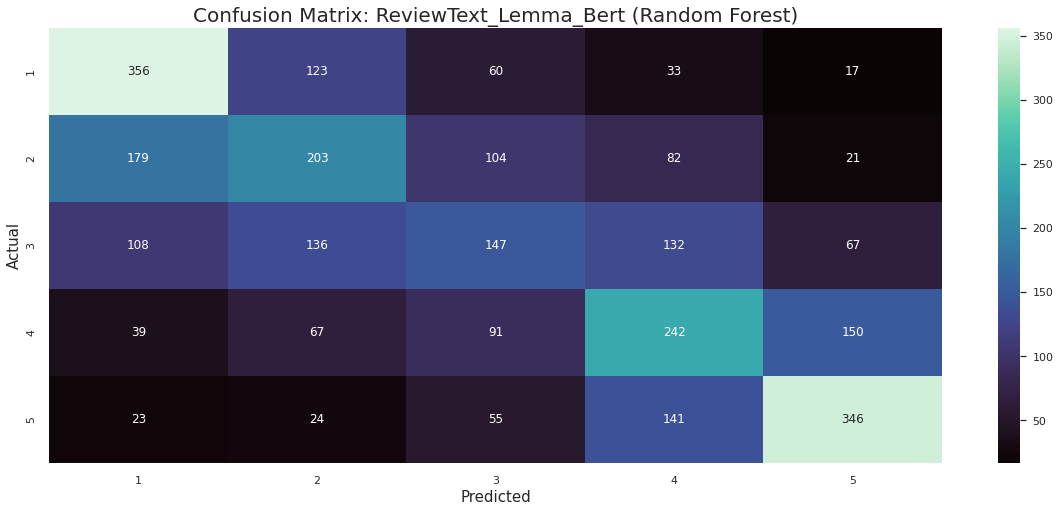

<Figure size 1440x576 with 0 Axes>

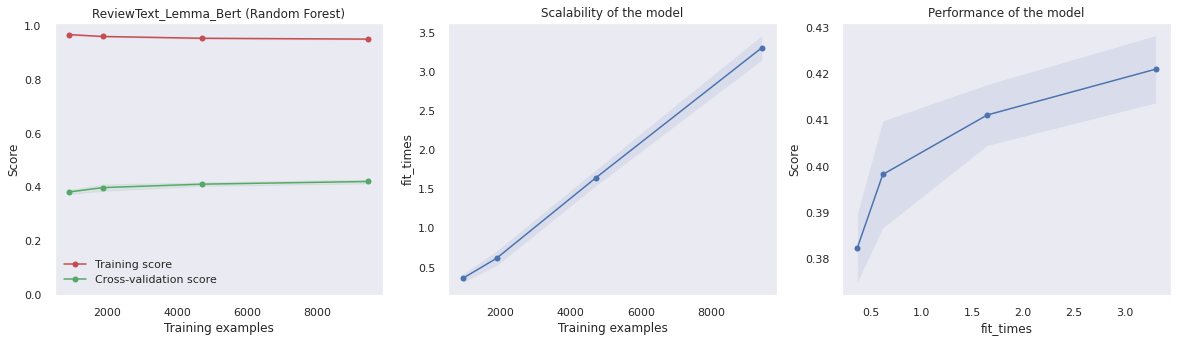

Final model ROCAUC not calculated. Starting now


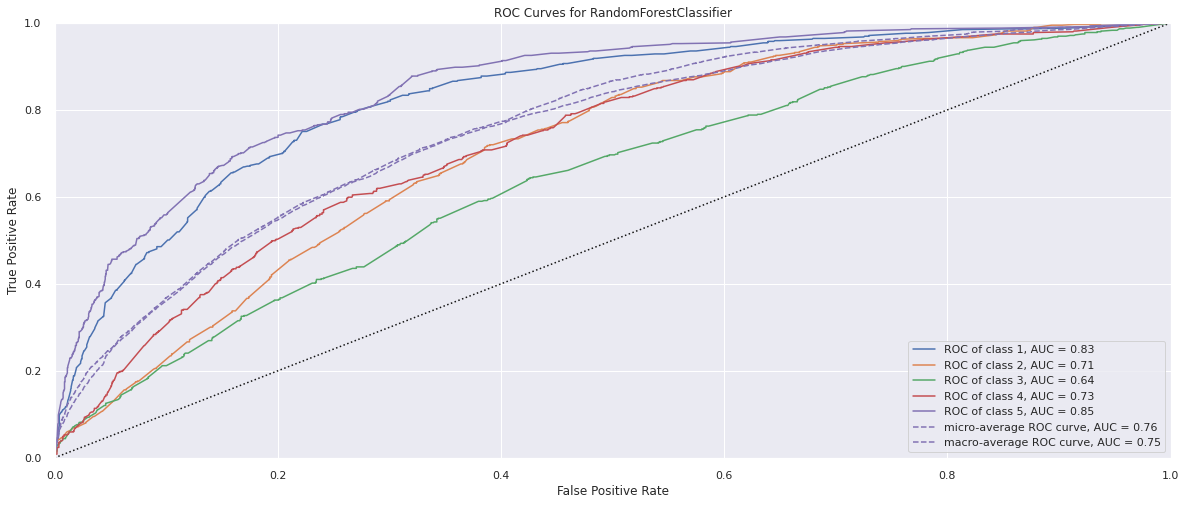

In [23]:
myExp.showFinalModelReport(axis_labels5)

In [25]:
myExp.display()

DataExperiment summary:
---> projectName: ML1010-Group-Project
---> experimentName: ReviewText_Lemma_Bert (Random Forest)
---> isDataPackageLoaded: True
---> isBaseModelLoaded: True
---> isBaseModelPredicted: True
---> isBaseModelLearningCurveCreated: True
---> isFinalModelLoaded: True
---> isFinalModelPredicted: True
---> isFinalModelLearningCurveCreated: True
---> isClassifierLoaded: True
RandomForestClassifier()

    DataPackage summary:
    Attributes:
    ---> uniqueColumn: uuid
    ---> targetColumn: overall
    Process:
    ---> isBalanced: True
    ---> isTrainTestSplit: True
    Data:
    ---> isOrigDataLoaded: False
    ---> isTrainDataLoaded: True
    ---> isTestDataLoaded: True


#  Save Experiment

In [ ]:
jarvis.saveExperiment(myExp, FILE_NAME)

#  Scratchpad